# Práctica_02 Continuación

##Análisis de texto con NLTK y WordCloud

In [1]:
import pandas as pd
import numpy as np
import pandas_profiling as pdprof
import matplotlib.pyplot as plt
%matplotlib inline

import sys
import nltk
import ssl
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import RegexpTokenizer

In [2]:
#Leeremos la base de datos de vinos.
df = pd.read_csv("C:\\Users\\Lizee\\Desktop\\MineriaDatos\\Practica_02\\rev-solo.csv")

In [3]:
#Veamos los primeros registros que la instrucción nos da por default
df.head()

,Aromas include tropical fruit broom brimstone and dried herb. The palate isn't overly expressive offering unripened apple citrus and dried sage alongside brisk acidity.,Italy,White Blend
0,This is ripe and fruity a wine that is smooth ...,Portugal,Portuguese Red
1,Tart and snappy the flavors of lime flesh and ...,US,Pinot Gris
2,Pineapple rind lemon pith and orange blossom s...,US,Riesling
3,Much like the regular bottling from 2012 this ...,US,Pinot Noir
4,Blackberry and raspberry aromas show a typical...,Spain,Tempranillo-Merlot


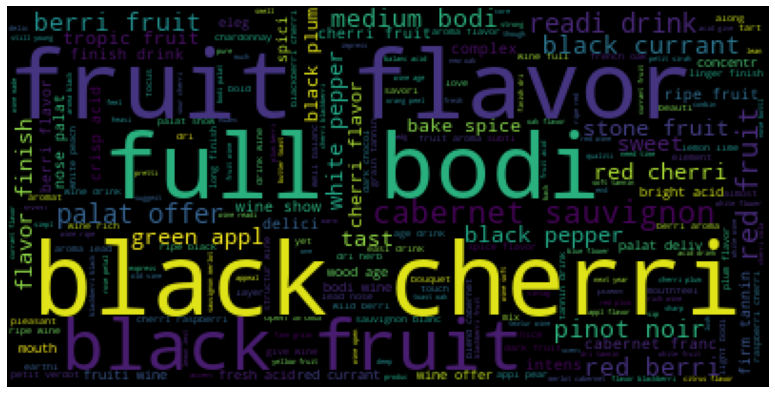

In [4]:
#Se toman las columnas Descripción, País y Variedad.
df.columns = ['description', 'country', 'variety']
#La función calcula la longitud de una cadena de caracteres o también cuántos elementos está en la lista.
n = len(df)
#Las Stop Words son palabras vacías y que no significan algo en concreto.
spa = stopwords.words("english")
#Este método sirve para reducir una palabra a su raíz.
stemmer = SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'\w+')
reemplazos = []
for r in range(n):
    original = df.description[r]
    reemplazo = ''
    if original != 'NaN':
        quedar = [stemmer.stem(p) for p in tokenizer.tokenize(original) if p.lower() not in spa]
        reemplazo = ' '.join(quedar)
    reemplazos.append(reemplazo)
df['limpios'] = reemplazos
texto = ' '.join(reemplazos)
nube = WordCloud().generate(texto)
plt.rcParams["figure.figsize"] = [15, 7]
plt.imshow(nube)
plt.axis("off")
plt.show()

Lo anterior muestra las palabras que más se repiten en la primera columna, en este caso Description.

In [9]:
#Se creó un nuevo csv para trabajar sólo con los datos de las columnas País, Descripción y Variedad.
header = ['country', 'description', 'variety']
df.to_csv('solo-rev.csv', columns = header)
e = pd.read_csv('solo-rev.csv')
e.head(4)

,Unnamed: 0,country,description,variety
0,0,Portugal,This is ripe and fruity a wine that is smooth ...,Portuguese Red
1,1,US,Tart and snappy the flavors of lime flesh and ...,Pinot Gris
2,2,US,Pineapple rind lemon pith and orange blossom s...,Riesling
3,3,US,Much like the regular bottling from 2012 this ...,Pinot Noir


In [10]:
#Se eliminó la columna Unnamed y se muestra para verificar.
e.drop(e.columns[[0]], axis=1, inplace=True)
e.head(2)

,country,description,variety
0,Portugal,This is ripe and fruity a wine that is smooth ...,Portuguese Red
1,US,Tart and snappy the flavors of lime flesh and ...,Pinot Gris


In [11]:
header = ['description', 'country', 'variety']
writer = e[e['country'] == 'Spain']
writer.to_csv('Spain-wine.csv', columns = header, index=False)

lol = pd.read_csv('Spain-wine.csv')
lol.head(4)

,description,country,variety
0,Blackberry and raspberry aromas show a typical...,Spain,Tempranillo-Merlot
1,Desiccated blackberry leather charred wood and...,Spain,Tempranillo Blend
2,Bland mature aromas of white fruits are on the...,Spain,Albariño
3,Ripe aromas of raisin black plum and horsehide...,Spain,Graciano


Se creó una nueva base de datos (csv) que contenga la descripción y variedad de vinos de España.

In [12]:
header = ['description', 'country', 'variety']
writer = e[e['country'] == 'Germany']
writer.to_csv('Germany-wine.csv', columns = header, index=False)

lol = pd.read_csv('Germany-wine.csv')
lol.head(4)

,description,country,variety
0,Savory dried thyme notes accent sunnier flavor...,Germany,Gewürztraminer
1,Zesty orange peels and apple notes abound in t...,Germany,Riesling
2,Earthy pollen and mineral notes lend a savory ...,Germany,Riesling
3,Pronounced dust pollen and earth tones lend sa...,Germany,Riesling


Se volvió a crear una segunda base de datos (csv) que contenga ahora la descripción y variedad de vinos de Alemania.

In [13]:
header = ['description', 'country', 'variety']
writer = e[e['country'] == 'Mexico']
writer.to_csv('Mexico-wine.csv', columns = header, index=False)

lol = pd.read_csv('Mexico-wine.csv')
lol.head(4)

,description,country,variety
0,The color is appropriately light the aromas ap...,Mexico,Nebbiolo
1,Sauvignon Blanc is in general one of Baja's mo...,Mexico,Sauvignon Blanc
2,Aromas of mature Cabernet: cassis tobacco leaf...,Mexico,Cabernet Sauvignon
3,While this is fiery on the nose you also get a...,Mexico,Nebbiolo


Por último, se creó una tercera base de datos (csv) que contenga la descripción y variedad de vinos de México.

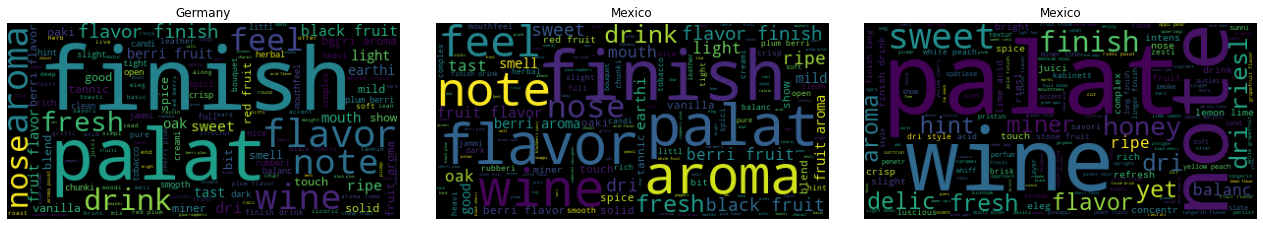

In [15]:
if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
dini = pd.read_csv("Spain-wine.csv", header = None)
dmcu = pd.read_csv("Germany-wine.csv", header = None)
dord = pd.read_csv("Mexico-wine.csv", header = None)
cols = ['description', 'country', 'variety']
dini.columns = cols
dmcu.columns = cols
dord.columns = cols
spa = stopwords.words("english")
stemmer = SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'\w+')
plt.rcParams["figure.figsize"] = [18, 9]
f = plt.figure() 
lbls = ["Spain", "Germany", "Mexico"]
i = 1
for d in [dini, dmcu, dord]:
    lbl = lbls.pop(0)
    reemplazos = []
    for r in range(len(d)):
        original = d.description[r]
        reemplazo = ''
        if original != 'NaN':
            quedar = [stemmer.stem(p) for p in tokenizer.tokenize(original) if p.lower() not in spa]
            reemplazo = ' '.join(quedar)
        reemplazos.append(reemplazo)
    d['limpios'] = reemplazos
    for tipo in lbls:
        sf = plt.subplot(3, 3, i)
        i += 1
        texto = ' '.join(reemplazos)
        sf.set_title(tipo)
        nube = WordCloud().generate(texto)
        sf.imshow(nube)
        sf.axis("off")
plt.tight_layout()
plt.show()

Lo anterior muestra las palabras que más se repiten de la columna Description para cada país, en este caso España, Alemania y México. Esto nos puede ayudar si queremos saber cuáles son las diferencias de los vinos entre dichos países.

En conclusión, el análisis de texto es un proceso que nos ayuda a inferir un significado más completo. No sólo nos serviría para esta práctica, sino que también para cualquier otro análisis de diferente tema.

Me pareció interesante porque tal vez podría ser útil para nuestro proyecto como clasificación de animales, es decir, si varía las características de una misma especie en diferentes lugares.